# Установка и загрузка библиотек

In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Примечание: это более быстрый способ установки detector2 в Colab, но он не включает все функции (например, скомпилированные операторы).
# См. https://detectron2.readthedocs.io/tutorials/install.html для полных инструкций по установке
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


Cloning into 'detectron2''...
fatal: protocol ''https' is not supported
�� 㤠���� ���� 㪠����� 䠩�.


In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# print("detectron2:", detectron2.__version__)

torch:  2.5 ; cuda:  cu121


"nvcc" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
import matplotlib.pyplot as plt

# Загрузка данных

In [5]:
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/77dd3242/train_annotations.json
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/edd91118/train1.zip
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/e5a98368/train2.zip
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/a95eacf7/train3.zip
# # ! wget https://storage.yandexcloud.net/ds-ods/files/files/a9a3642d/train4.zip
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/cbdba63e/val_annotations.json
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/adacb253/val.zip
# ! wget https://storage.yandexcloud.net/ds-ods/files/files/2ad601fd/test.zip

In [6]:
# ! unzip train1.zip
# ! unzip train2.zip
# ! unzip train3.zip
# ! unzip train4.zip
# ! unzip val.zip
# ! unzip test.zip

In [7]:
# !mkdir train

In [6]:
import shutil
import os

In [9]:
# 


In [10]:
# import json

In [9]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("animal_train", {}, "train_annotations.json", "train")
register_coco_instances("animal_val", {}, "val_annotations.json", "val")

In [10]:
animal_metadata = MetadataCatalog.get('animal_val')
dataset_dicts = DatasetCatalog.get("animal_val")

[01/24 17:24:24 d2.data.datasets.coco]: Loading val_annotations.json takes 2.37 seconds.
WARNING [01/24 17:24:24 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/24 17:24:24 d2.data.datasets.coco]: Loaded 8557 images in COCO format from val_annotations.json
WARNING [01/24 17:24:24 d2.data.datasets.coco]: Filtered out 2 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


Визуализируем изображения с разметкой

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weig

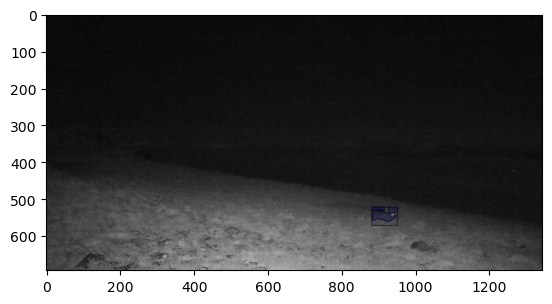

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=6.016620334457477.
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='

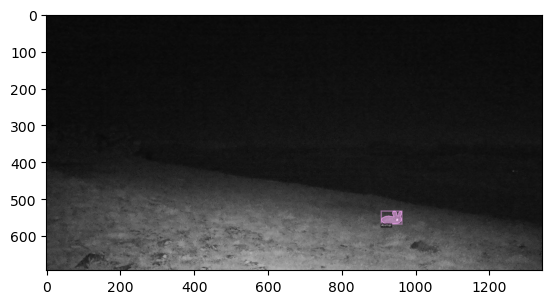

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=7.0527968580032985.
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='d:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant=

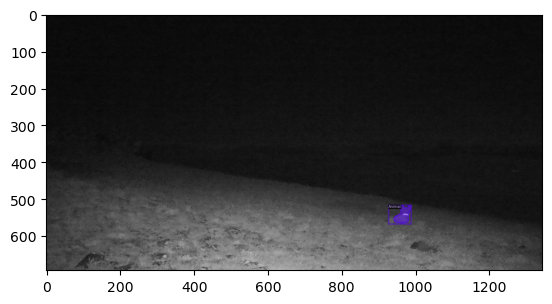

In [11]:
for d in dataset_dicts[:3]:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=animal_metadata, scale=1)
    out = visualizer.draw_dataset_dict(d)
    plt.imshow(out.get_image()[:, :, ::])
    plt.show()

In [12]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as tt

from PIL import Image
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.models import ResNet18_Weights
from tqdm.notebook import tqdm


# Зафиксируем сиды, чтобы обучение было воспроизводимым.
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(1001)

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


# Обучение модели инстанс сегментации

In [13]:
import torch
print("CUDA доступна:", torch.cuda.is_available())
print("Используемый GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Нет GPU")

CUDA доступна: True
Используемый GPU: NVIDIA GeForce RTX 4070 Ti SUPER


In [ ]:
from ultralytics import YOLO

# Задаем путь к вашему конфигу и модели
config_path = "yolov8_config.yaml"

# Загружаем предобученную модель для сегментации (YOLOv8s-seg)
model = YOLO("yolov8s-seg.pt")

# Настраиваем параметры обучения
model.train(
    data=config_path,  # Путь к конфигурационному файлу
    epochs=100,        # Количество эпох
    batch=16,          # Размер батча
    imgsz=640,         # Размер изображения
    workers=4,         # Количество потоков
    save_period=1,     # Сохранять модель каждый epoch
    patience=10,       # Ранний стоп, если метрика не улучшается
    device=0           # Указываем GPU (0) или CPU (-1)
)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator
from detectron2.engine.hooks import BestCheckpointer
import os

cfg = get_cfg()
cfg.MODEL.DEVICE = "cuda"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")

# Datasets
cfg.DATASETS.TRAIN = ("animal_train",)
cfg.DATASETS.TEST = ("animal_val",)
cfg.DATALOADER.NUM_WORKERS = 4

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 4

cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 60000
cfg.SOLVER.STEPS = (30000, 35000)
cfg.SOLVER.GAMMA = 0.1
cfg.SOLVER.WARMUP_FACTOR = 1.0 / 1000
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MOMENTUM = 0.9
cfg.SOLVER.WEIGHT_DECAY = 0.0001

# Model parameters
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05
cfg.MODEL.ROI_BOX_HEAD.DROPOUT = 0.5
cfg.MODEL.BACKBONE.FREEZE_AT = 2

# Input
cfg.INPUT.MIN_SIZE_TRAIN = (640, 672, 704, 736, 768, 800)
cfg.INPUT.MAX_SIZE_TRAIN = 1333
cfg.INPUT.MIN_SIZE_TEST = 800
cfg.INPUT.MAX_SIZE_TEST = 1333
cfg.INPUT.RANDOM_FLIP = "horizontal"

# Evaluation settings - Run evaluation only at the end
cfg.TEST.EVAL_PERIOD = cfg.SOLVER.MAX_ITER  # Evaluate only at the end

class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name):
        return COCOEvaluator(dataset_name, cfg, False, output_dir=cfg.OUTPUT_DIR)

    def build_hooks(self):
        hooks_list = super().build_hooks()
        hooks_list.insert(
            -1,
            BestCheckpointer(
                eval_period=cfg.TEST.EVAL_PERIOD,
                checkpointer=self.checkpointer,
                val_metric="bbox/AP",
                mode="max"
            )
        )
        return hooks_list

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = CustomTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/13 12:25:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

In [17]:
# 0.7919
# from detectron2.engine import DefaultTrainer
# from detectron2.engine import BestCheckpointer

# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.DATASETS.TRAIN = ("animal_train",)
# cfg.DATASETS.TEST = ()
# cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
# cfg.DATASETS.TEST = ("animal_val",)
# cfg.TEST.EVAL_PERIOD = 10000
# cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"
# cfg.SOLVER.STEPS = (5000, 6000)
# cfg.SOLVER.GAMMA = 0.1
# cfg.INPUT.MIN_SIZE_TRAIN = (640, 672, 704, 736, 768, 800)
# cfg.INPUT.MAX_SIZE_TRAIN = 1333
# cfg.INPUT.MIN_SIZE_TEST = 800
# cfg.INPUT.MAX_SIZE_TEST = 1333
# cfg.INPUT.RANDOM_FLIP = "horizontal"
# cfg.INPUT.BRIGHTNESS = 0.8
# cfg.INPUT.CONTRAST = 0.8
# cfg.INPUT.SATURATION = 0.8
# cfg.INPUT.HUE = 0.1
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.MAX_ITER = 10000
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg) 
# trainer.resume_or_load(resume=False)
# trainer.train()

[01/11 21:29:26 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[01/11 21:29:32 d2.engine.train_loop]: Starting training from iteration 0


d:\anaconda\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/11 21:29:39 d2.utils.events]:  eta: 0:26:01  iter: 19  total_loss: 1.456  loss_cls: 0.5838  loss_box_reg: 0.1437  loss_mask: 0.6937  loss_rpn_cls: 0.004031  loss_rpn_loc: 0.00446    time: 0.1573  last_time: 0.1569  data_time: 0.1234  last_data_time: 0.0012   lr: 1.9981e-05  max_mem: 2283M
[01/11 21:29:42 d2.utils.events]:  eta: 0:25:31  iter: 39  total_loss: 1.171  loss_cls: 0.3332  loss_box_reg: 0.1444  loss_mask: 0.6482  loss_rpn_cls: 0.002684  loss_rpn_loc: 0.004212    time: 0.1540  last_time: 0.1518  data_time: 0.0013  last_data_time: 0.0011   lr: 3.9961e-05  max_mem: 2283M
[01/11 21:29:46 d2.utils.events]:  eta: 0:25:11  iter: 59  total_loss: 0.8587  loss_cls: 0.1625  loss_box_reg: 0.1262  loss_mask: 0.5523  loss_rpn_cls: 0.006642  loss_rpn_loc: 0.003462    time: 0.1530  last_time: 0.1537  data_time: 0.0013  last_data_time: 0.0014   lr: 5.9941e-05  max_mem: 2283M
[01/11 21:29:49 d2.utils.events]:  eta: 0:25:08  iter: 79  total_loss: 0.7174  loss_cls: 0.1015  loss_box_reg: 0.11

In [18]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator
from detectron2.engine.hooks import BestCheckpointer
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")

# Datasets
cfg.DATASETS.TRAIN = ("animal_train",)
cfg.DATASETS.TEST = ("animal_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.SOLVER.MAX_ITER = 40000
# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.TEST.EVAL_PERIOD = cfg.SOLVER.MAX_ITER 
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[01/12 11:01:10 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

d:\anaconda\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/12 11:01:34 d2.utils.events]:  eta: 6:52:10  iter: 19  total_loss: 0.4734  loss_cls: 0.2391  loss_box_reg: 0.04141  loss_mask: 0.1639  loss_rpn_cls: 0.005695  loss_rpn_loc: 0.00332    time: 0.6203  last_time: 0.6207  data_time: 0.1300  last_data_time: 0.0024   lr: 0.00039962  max_mem: 9189M
[01/12 11:01:47 d2.utils.events]:  eta: 6:51:15  iter: 39  total_loss: 0.2184  loss_cls: 0.03951  loss_box_reg: 0.03617  loss_mask: 0.1284  loss_rpn_cls: 0.003989  loss_rpn_loc: 0.003201    time: 0.6183  last_time: 0.6170  data_time: 0.0025  last_data_time: 0.0034   lr: 0.00079922  max_mem: 9194M
[01/12 11:01:59 d2.utils.events]:  eta: 6:53:05  iter: 59  total_loss: 0.23  loss_cls: 0.03969  loss_box_reg: 0.04061  loss_mask: 0.1264  loss_rpn_cls: 0.002291  loss_rpn_loc: 0.002671    time: 0.6194  last_time: 0.6159  data_time: 0.0023  last_data_time: 0.0023   lr: 0.0011988  max_mem: 9225M
[01/12 11:02:12 d2.utils.events]:  eta: 6:52:25  iter: 79  total_loss: 0.2461  loss_cls: 0.04372  loss_box_reg:

In [19]:
import pycocotools

# Формирование файла с предсказанием

In [20]:
from tqdm import tqdm
# Папка с тестовыми изображениями
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

test_folder = "test"
output_folder = "output"  # Папка для сохранения результатов
os.makedirs(output_folder, exist_ok=True)

# Список для хранения предсказаний в нужном формате
predictions = []

# Обработка изображений
for file_name in tqdm(os.listdir(test_folder)):
    image_path = os.path.join(test_folder, file_name)
    image = cv2.imread(image_path)

    # Выполнение предсказания
    outputs = predictor(image)

    # Получаем сегментацию и другие данные
    instances = outputs["instances"].to("cpu")
    # print(instances)
    pred_classes = instances.pred_classes.tolist()  # Классы объектов
    pred_boxes = instances.pred_boxes.tensor.tolist()  # Координаты bbox
    pred_scores = instances.scores.tolist()  # Скоринг предсказаний
    pred_segmentation = instances.pred_masks.tolist()  # Сегментация
    
    # Сохраняем предсказания для каждого объекта в изображении
    for i in range(len(pred_classes)):
        # pred_segmentation = instances.pred_masks.tolist()
        rle = pycocotools.mask.encode(np.asfortranarray(pred_segmentation[i]))
        predictions.append({
            "image_name": file_name,
            "category_id": pred_classes[i],  # ID категории
            "bbox": pred_boxes[i],  # Координаты bounding box
            "score": pred_scores[i],  # Оценка уверенности
            "segmentation": {
                "size" : rle["size"],
                "counts" : str(rle["counts"])
            }  # Сегментация в формате RLE
        })


# Сохранение предсказаний в JSON
predictions_file = os.path.join(output_folder, "submission.json")
with open(predictions_file, "w") as f:
    json.dump(predictions, f, indent=4)

print(f"Обработка завершена. Результаты сохранены в папке: {output_folder}")


[01/13 12:26:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...
[Checkpointer] Loading from ./output\model_final.pth ...


d:\anaconda\Lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))
100%|████

Обработка завершена. Результаты сохранены в папке: output
